In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

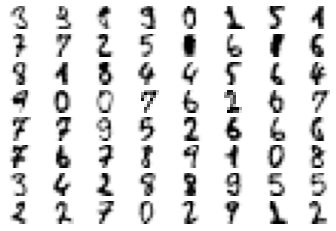

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

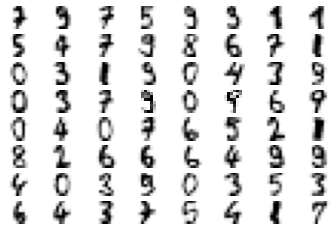

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09601 stdev: 0.03928
Best fitness: 0.19481 - size: (10, 64) - species 1 - id 30
Average adjusted fitness: 0.082
Mean genetic distance 2.834, standard deviation 0.319
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 53.630 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11480 stdev: 0.03740
Best fitness: 0.22387 - size: (10, 64) - species 25 - id 283
Average adjusted fitness: 0.095
Mean genetic distance 2.914, standard deviation 0.339
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 56.199 sec (54.915 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12519 stdev: 0.04101
Best fitness: 0.24985 - size: (11, 65) - species 3 - id 486
Average adjusted fitness: 0.103
Mean genetic distance 2.958, standard deviation 0.354
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 67.629 sec (5

Population's average fitness: 0.16764 stdev: 0.05559
Best fitness: 0.30179 - size: (15, 74) - species 33 - id 2992
Average adjusted fitness: 0.121
Mean genetic distance 3.167, standard deviation 0.440
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 62.431 sec (63.454 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16746 stdev: 0.05464
Best fitness: 0.30179 - size: (15, 74) - species 33 - id 2992
Average adjusted fitness: 0.113
Mean genetic distance 3.177, standard deviation 0.433
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 66.006 sec (63.734 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16661 stdev: 0.05642
Best fitness: 0.30179 - size: (15, 74) - species 33 - id 2992
Average adjusted fitness: 0.138
Mean genetic distance 3.156, standard deviation 0.446
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 64.557 sec (64.004 average)

Population's average fitness: 0.17978 stdev: 0.06000
Best fitness: 0.33395 - size: (16, 76) - species 33 - id 4495
Average adjusted fitness: 0.118
Mean genetic distance 3.138, standard deviation 0.551
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 65.711 sec (67.440 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17536 stdev: 0.06095
Best fitness: 0.33395 - size: (16, 76) - species 33 - id 4495
Average adjusted fitness: 0.115
Mean genetic distance 3.128, standard deviation 0.541
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 67.683 sec (67.464 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17877 stdev: 0.05917
Best fitness: 0.33395 - size: (16, 76) - species 33 - id 4495
Average adjusted fitness: 0.150
Mean genetic distance 3.124, standard deviation 0.534
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 66.270 sec (67.439 average)

Population's average fitness: 0.16801 stdev: 0.05996
Best fitness: 0.33828 - size: (18, 77) - species 45 - id 8171
Average adjusted fitness: 0.107
Mean genetic distance 3.111, standard deviation 0.608
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 75.198 sec (74.613 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.17866 stdev: 0.06033
Best fitness: 0.33828 - size: (18, 77) - species 45 - id 8171
Average adjusted fitness: 0.110
Mean genetic distance 3.131, standard deviation 0.593
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 76.761 sec (75.045 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18497 stdev: 0.05981
Best fitness: 0.33828 - size: (18, 77) - species 45 - id 8171
Average adjusted fitness: 0.153
Mean genetic distance 3.102, standard deviation 0.602
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 75.260 sec (75.382 average)

Population's average fitness: 0.17729 stdev: 0.05983
Best fitness: 0.34756 - size: (23, 88) - species 52 - id 14747
Average adjusted fitness: 0.135
Mean genetic distance 3.025, standard deviation 0.582
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.293 sec (73.874 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.17049 stdev: 0.06014
Best fitness: 0.34756 - size: (23, 88) - species 52 - id 14747
Average adjusted fitness: 0.108
Mean genetic distance 3.032, standard deviation 0.610
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 75.112 sec (74.134 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.17598 stdev: 0.06038
Best fitness: 0.34756 - size: (23, 88) - species 52 - id 14747
Average adjusted fitness: 0.131
Mean genetic distance 3.044, standard deviation 0.600
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.195 sec (73.698 average

Population's average fitness: 0.19462 stdev: 0.07007
Best fitness: 0.38343 - size: (24, 87) - species 59 - id 18599
Average adjusted fitness: 0.180
Mean genetic distance 3.082, standard deviation 0.657
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 81.922 sec (80.899 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19583 stdev: 0.06175
Best fitness: 0.38343 - size: (24, 87) - species 59 - id 18599
Average adjusted fitness: 0.143
Mean genetic distance 3.088, standard deviation 0.650
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 81.017 sec (80.646 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19009 stdev: 0.06984
Best fitness: 0.38343 - size: (24, 87) - species 59 - id 18599
Average adjusted fitness: 0.183
Mean genetic distance 3.073, standard deviation 0.651
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 81.810 sec (80.402 averag

Population's average fitness: 0.18169 stdev: 0.07392
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.140
Mean genetic distance 3.063, standard deviation 0.620
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 88.139 sec (87.456 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.18837 stdev: 0.07067
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.145
Mean genetic distance 3.045, standard deviation 0.608
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 89.066 sec (87.944 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.18411 stdev: 0.07573
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.148
Mean genetic distance 3.043, standard deviation 0.625
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 91.140 sec (87.915 ave

Population's average fitness: 0.18809 stdev: 0.07102
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.178
Mean genetic distance 3.043, standard deviation 0.629
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 91.833 sec (89.453 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.18972 stdev: 0.07495
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.149
Mean genetic distance 3.064, standard deviation 0.634
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 93.849 sec (89.811 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19670 stdev: 0.07166
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.136
Mean genetic distance 3.041, standard deviation 0.649
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 92.498 sec (90.118 ave

Population's average fitness: 0.18154 stdev: 0.06952
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.154
Mean genetic distance 2.952, standard deviation 0.602
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 89.738 sec (93.155 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.18040 stdev: 0.07182
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.114
Mean genetic distance 3.029, standard deviation 0.561
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 93.280 sec (93.177 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.17958 stdev: 0.07293
Best fitness: 0.39951 - size: (24, 91) - species 65 - id 21127
Average adjusted fitness: 0.152
Mean genetic distance 3.034, standard deviation 0.575
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 93.714 sec (93.014 aver

Population's average fitness: 0.18463 stdev: 0.07274
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.147
Mean genetic distance 3.003, standard deviation 0.603
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 95.067 sec (95.728 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.18608 stdev: 0.07177
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.151
Mean genetic distance 2.992, standard deviation 0.584
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 97.972 sec (96.252 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.18467 stdev: 0.07347
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.126
Mean genetic distance 2.969, standard deviation 0.587
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 99.147 sec (96.507 ave

Population's average fitness: 0.19844 stdev: 0.07102
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.146
Mean genetic distance 2.983, standard deviation 0.601
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 94.182 sec (95.563 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.19042 stdev: 0.07569
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.145
Mean genetic distance 2.990, standard deviation 0.599
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 95.814 sec (95.680 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.18411 stdev: 0.07441
Best fitness: 0.40322 - size: (32, 106) - species 80 - id 34909
Average adjusted fitness: 0.131
Mean genetic distance 2.984, standard deviation 0.604
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 96.182 sec (95.630 

Mean genetic distance 2.854, standard deviation 0.533
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 80.164 sec (95.328 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.19885 stdev: 0.08064
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.151
Mean genetic distance 2.862, standard deviation 0.515
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 81.536 sec (93.777 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.19923 stdev: 0.08363
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.179
Mean genetic distance 2.888, standard deviation 0.565
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 80.924 sec (92.001 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20051 stdev: 0.07947
Best fitness: 0.41558 - size: (42, 115) - spec

Population's average fitness: 0.16826 stdev: 0.07617
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.159
Mean genetic distance 2.793, standard deviation 0.454
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 78.178 sec (79.883 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.16550 stdev: 0.07821
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.156
Mean genetic distance 2.837, standard deviation 0.461
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 81.771 sec (80.065 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.16800 stdev: 0.07543
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.162
Mean genetic distance 2.830, standard deviation 0.483
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 78.219 sec (79.971 

Mean genetic distance 2.787, standard deviation 0.475
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 66.671 sec (66.159 average)

 ****** Running generation 311 ****** 

Population's average fitness: 0.18375 stdev: 0.07659
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.162
Mean genetic distance 2.785, standard deviation 0.468
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 66.568 sec (65.964 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.18366 stdev: 0.07841
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.163
Mean genetic distance 2.782, standard deviation 0.455
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 67.437 sec (66.030 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.19083 stdev: 0.07576
Best fitness: 0.41558 - size: (42, 115) - spec

Population's average fitness: 0.17664 stdev: 0.07839
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.160
Mean genetic distance 2.806, standard deviation 0.514
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 64.238 sec (65.361 average)

 ****** Running generation 335 ****** 

Population's average fitness: 0.19619 stdev: 0.07437
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.178
Mean genetic distance 2.818, standard deviation 0.520
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 64.800 sec (65.156 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.17983 stdev: 0.08140
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.166
Mean genetic distance 2.820, standard deviation 0.569
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 66.072 sec (65.147 ave

Population's average fitness: 0.18810 stdev: 0.07641
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.170
Mean genetic distance 2.926, standard deviation 0.535
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 67.082 sec (68.039 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.18523 stdev: 0.07829
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.149
Mean genetic distance 2.918, standard deviation 0.512
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 67.140 sec (67.986 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.18263 stdev: 0.07641
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.162
Mean genetic distance 2.898, standard deviation 0.537
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 69.508 sec (68.069 ave

Population's average fitness: 0.18443 stdev: 0.08023
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.169
Mean genetic distance 3.064, standard deviation 0.602
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 54.349 sec (53.472 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.18620 stdev: 0.07766
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.172
Mean genetic distance 3.045, standard deviation 0.590
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.501 sec (52.781 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.17826 stdev: 0.07896
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.168
Mean genetic distance 3.048, standard deviation 0.593
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 53.265 sec (52.580 ave

Population's average fitness: 0.19015 stdev: 0.07862
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.167
Mean genetic distance 3.009, standard deviation 0.550
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 55.739 sec (54.411 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.18730 stdev: 0.08134
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.165
Mean genetic distance 2.984, standard deviation 0.601
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 56.231 sec (54.765 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.19415 stdev: 0.08309
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.178
Mean genetic distance 2.984, standard deviation 0.602
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 51.725 sec (54.618 av

Population's average fitness: 0.19243 stdev: 0.08107
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.198
Mean genetic distance 2.804, standard deviation 0.567
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.632 sec (55.595 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.18735 stdev: 0.07638
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.147
Mean genetic distance 2.800, standard deviation 0.553
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 47.540 sec (54.831 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.18567 stdev: 0.08027
Best fitness: 0.41558 - size: (42, 115) - species 91 - id 43657
Average adjusted fitness: 0.138
Mean genetic distance 2.786, standard deviation 0.558
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.866 sec (53.865 ave

Population's average fitness: 0.20196 stdev: 0.08214
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.177
Mean genetic distance 2.913, standard deviation 0.546
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 47.773 sec (48.992 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.19076 stdev: 0.08347
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.143
Mean genetic distance 2.918, standard deviation 0.517
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 48.728 sec (48.847 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.19379 stdev: 0.08188
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.193
Mean genetic distance 2.901, standard deviation 0.527
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 49.950 sec (49.108 ave

Population's average fitness: 0.19748 stdev: 0.08171
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.176
Mean genetic distance 2.931, standard deviation 0.532
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 58.531 sec (58.824 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.19297 stdev: 0.07982
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.130
Mean genetic distance 2.908, standard deviation 0.536
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 56.175 sec (57.903 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.19748 stdev: 0.07986
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.156
Mean genetic distance 2.920, standard deviation 0.523
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 57.050 sec (57.481 ave

Population's average fitness: 0.18182 stdev: 0.07898
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.130
Mean genetic distance 2.769, standard deviation 0.547
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 53.595 sec (54.487 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.19159 stdev: 0.07822
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.171
Mean genetic distance 2.777, standard deviation 0.537
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 55.296 sec (54.845 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.18363 stdev: 0.07896
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.157
Mean genetic distance 2.785, standard deviation 0.469
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 60.326 sec (55.598 ave

Population's average fitness: 0.18227 stdev: 0.08299
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.171
Mean genetic distance 2.835, standard deviation 0.456
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 65.218 sec (61.378 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.18974 stdev: 0.07875
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.183
Mean genetic distance 2.840, standard deviation 0.463
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 60.960 sec (61.539 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.18812 stdev: 0.08278
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.145
Mean genetic distance 2.845, standard deviation 0.476
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 60.130 sec (61.794 ave

Population's average fitness: 0.18805 stdev: 0.08076
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.181
Mean genetic distance 2.785, standard deviation 0.485
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 54.737 sec (58.483 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.18253 stdev: 0.08222
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.168
Mean genetic distance 2.769, standard deviation 0.488
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 55.469 sec (58.039 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.17989 stdev: 0.07883
Best fitness: 0.42362 - size: (33, 108) - species 80 - id 77509
Average adjusted fitness: 0.165
Mean genetic distance 2.776, standard deviation 0.440
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 56.083 sec (57.546 ave

Mean genetic distance 2.733, standard deviation 0.393
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 60.669 sec (57.509 average)

 ****** Running generation 574 ****** 

Population's average fitness: 0.21167 stdev: 0.09709
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.193
Mean genetic distance 2.735, standard deviation 0.405
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 60.231 sec (58.206 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.20488 stdev: 0.09480
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.188
Mean genetic distance 2.726, standard deviation 0.420
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 57.006 sec (58.335 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.21289 stdev: 0.09427
Best fitness: 0.42424 - size: (59, 132) - 

Population's average fitness: 0.20665 stdev: 0.09094
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.198
Mean genetic distance 2.723, standard deviation 0.481
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.748 sec (59.276 average)

 ****** Running generation 598 ****** 

Population's average fitness: 0.21785 stdev: 0.08777
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.215
Mean genetic distance 2.716, standard deviation 0.477
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 63.314 sec (59.610 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.21186 stdev: 0.09131
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.205
Mean genetic distance 2.699, standard deviation 0.477
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 60.061 sec (59.8

Mean genetic distance 2.614, standard deviation 0.493
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 60.437 sec (59.410 average)

 ****** Running generation 621 ****** 

Population's average fitness: 0.18500 stdev: 0.08555
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.168
Mean genetic distance 2.642, standard deviation 0.457
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 62.538 sec (59.850 average)

 ****** Running generation 622 ****** 

Population's average fitness: 0.18704 stdev: 0.08039
Best fitness: 0.42424 - size: (59, 132) - species 154 - id 102242
Average adjusted fitness: 0.168
Mean genetic distance 2.671, standard deviation 0.426
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 61.555 sec (59.808 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.17976 stdev: 0.08046
Best fitness: 0.42424 - size: (59, 132) - spe

Population's average fitness: 0.20424 stdev: 0.09741
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.207
Mean genetic distance 2.669, standard deviation 0.389
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 61.776 sec (63.412 average)

 ****** Running generation 645 ****** 

Population's average fitness: 0.21266 stdev: 0.09085
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.209
Mean genetic distance 2.673, standard deviation 0.385
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 60.784 sec (63.137 average)

 ****** Running generation 646 ****** 

Population's average fitness: 0.20056 stdev: 0.09165
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.153
Mean genetic distance 2.703, standard deviation 0.356
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 65.917 sec (6

Mean genetic distance 2.778, standard deviation 0.390
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.758 sec (62.041 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.21485 stdev: 0.08993
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.167
Mean genetic distance 2.775, standard deviation 0.398
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.432 sec (62.156 average)

 ****** Running generation 669 ****** 

Population's average fitness: 0.20494 stdev: 0.08922
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.158
Mean genetic distance 2.772, standard deviation 0.391
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 63.250 sec (62.380 average)

 ****** Running generation 670 ****** 

Population's average fitness: 0.20741 stdev: 0.09352
Best fitness: 0.43847 - size: (57, 129) - sp

Population's average fitness: 0.20015 stdev: 0.09033
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.149
Mean genetic distance 2.830, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 59.494 sec (61.363 average)

 ****** Running generation 692 ****** 

Population's average fitness: 0.19944 stdev: 0.08973
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.168
Mean genetic distance 2.841, standard deviation 0.455
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 61.719 sec (61.387 average)

 ****** Running generation 693 ****** 

Population's average fitness: 0.20796 stdev: 0.08970
Best fitness: 0.43847 - size: (57, 129) - species 154 - id 113090
Average adjusted fitness: 0.191
Mean genetic distance 2.711, standard deviation 0.497
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 61.318 sec (61.3

Mean genetic distance 2.837, standard deviation 0.461
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 61.112 sec (63.092 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.20642 stdev: 0.09787
Best fitness: 0.44341 - size: (62, 130) - species 175 - id 124414
Average adjusted fitness: 0.183
Mean genetic distance 2.838, standard deviation 0.439
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 61.892 sec (62.857 average)

 ****** Running generation 716 ****** 

Population's average fitness: 0.20854 stdev: 0.09858
Best fitness: 0.44341 - size: (62, 130) - species 175 - id 124414
Average adjusted fitness: 0.189
Mean genetic distance 2.844, standard deviation 0.450
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 64.168 sec (62.920 average)

 ****** Running generation 717 ****** 

Population's average fitness: 0.20977 stdev: 0.09856
Best fitness: 0.44341 - size: (62, 130) - 

Population's average fitness: 0.21560 stdev: 0.09497
Best fitness: 0.44341 - size: (59, 132) - species 189 - id 129793
Average adjusted fitness: 0.202
Mean genetic distance 2.821, standard deviation 0.479
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 64.425 sec (62.859 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.20653 stdev: 0.09928
Best fitness: 0.44341 - size: (59, 132) - species 189 - id 129793
Average adjusted fitness: 0.196
Mean genetic distance 2.843, standard deviation 0.520
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 63.244 sec (63.143 average)

 ****** Running generation 740 ****** 

Population's average fitness: 0.20679 stdev: 0.09507
Best fitness: 0.44341 - size: (59, 132) - species 189 - id 129793
Average adjusted fitness: 0.199
Mean genetic distance 2.830, standard deviation 0.532
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 69.135 sec (64.1

Mean genetic distance 2.844, standard deviation 0.541
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 65.067 sec (64.110 average)

 ****** Running generation 762 ****** 

Population's average fitness: 0.20570 stdev: 0.09112
Best fitness: 0.45331 - size: (60, 130) - species 189 - id 134792
Average adjusted fitness: 0.200
Mean genetic distance 2.896, standard deviation 0.519
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 64.287 sec (64.130 average)

 ****** Running generation 763 ****** 

Population's average fitness: 0.20101 stdev: 0.09367
Best fitness: 0.45331 - size: (60, 130) - species 189 - id 134792
Average adjusted fitness: 0.197
Mean genetic distance 2.932, standard deviation 0.522
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.253 sec (63.883 average)

 ****** Running generation 764 ****** 

Population's average fitness: 0.18966 stdev: 0.09356
Best fitness: 0.45331 - size: (60, 130) - spe

Population's average fitness: 0.19685 stdev: 0.09522
Best fitness: 0.45702 - size: (63, 131) - species 175 - id 139249
Average adjusted fitness: 0.177
Mean genetic distance 2.961, standard deviation 0.620
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 61.673 sec (63.301 average)

 ****** Running generation 786 ****** 

Population's average fitness: 0.20663 stdev: 0.09726
Best fitness: 0.45702 - size: (63, 131) - species 175 - id 139249
Average adjusted fitness: 0.196
Mean genetic distance 2.953, standard deviation 0.622
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.996 sec (63.477 average)

 ****** Running generation 787 ****** 

Population's average fitness: 0.21066 stdev: 0.09626
Best fitness: 0.45702 - size: (63, 131) - species 175 - id 139249
Average adjusted fitness: 0.199
Mean genetic distance 2.970, standard deviation 0.599
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 60.746 sec (62.6

Mean genetic distance 2.922, standard deviation 0.540
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 61.401 sec (61.132 average)

 ****** Running generation 809 ****** 

Population's average fitness: 0.20398 stdev: 0.10070
Best fitness: 0.46135 - size: (61, 131) - species 189 - id 141604
Average adjusted fitness: 0.197
Mean genetic distance 2.924, standard deviation 0.549
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 61.075 sec (60.800 average)

 ****** Running generation 810 ****** 

Population's average fitness: 0.21416 stdev: 0.10188
Best fitness: 0.46135 - size: (61, 131) - species 189 - id 141604
Average adjusted fitness: 0.205
Mean genetic distance 2.916, standard deviation 0.543
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 61.746 sec (60.819 average)

 ****** Running generation 811 ****** 

Population's average fitness: 0.21681 stdev: 0.10118
Best fitness: 0.46135 - size: (61, 131) - 

Population's average fitness: 0.23284 stdev: 0.10871
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.233
Mean genetic distance 2.788, standard deviation 0.476
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 63.135 sec (62.409 average)

 ****** Running generation 833 ****** 

Population's average fitness: 0.22358 stdev: 0.10792
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.202
Mean genetic distance 2.778, standard deviation 0.448
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 60.312 sec (62.223 average)

 ****** Running generation 834 ****** 

Population's average fitness: 0.22808 stdev: 0.11384
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.222
Mean genetic distance 2.803, standard deviation 0.453
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 60.103 sec (6

Mean genetic distance 2.589, standard deviation 0.449
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 56.450 sec (58.033 average)

 ****** Running generation 856 ****** 

Population's average fitness: 0.20330 stdev: 0.09192
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.196
Mean genetic distance 2.592, standard deviation 0.420
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 56.256 sec (57.822 average)

 ****** Running generation 857 ****** 

Population's average fitness: 0.20303 stdev: 0.09183
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.196
Mean genetic distance 2.599, standard deviation 0.441
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 57.896 sec (57.801 average)

 ****** Running generation 858 ****** 

Population's average fitness: 0.21393 stdev: 0.09301
Best fitness: 0.47928 - size: (64, 127) - spe

Population's average fitness: 0.23408 stdev: 0.10171
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.222
Mean genetic distance 2.716, standard deviation 0.413
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 58.143 sec (50.113 average)

 ****** Running generation 880 ****** 

Population's average fitness: 0.23353 stdev: 0.10213
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.214
Mean genetic distance 2.712, standard deviation 0.418
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 58.743 sec (51.247 average)

 ****** Running generation 881 ****** 

Population's average fitness: 0.23456 stdev: 0.10073
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.201
Mean genetic distance 2.720, standard deviation 0.419
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 60.837 sec (5

Mean genetic distance 2.771, standard deviation 0.405
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 65.161 sec (58.865 average)

 ****** Running generation 903 ****** 

Population's average fitness: 0.23077 stdev: 0.09984
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.206
Mean genetic distance 2.758, standard deviation 0.429
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 57.960 sec (58.736 average)

 ****** Running generation 904 ****** 

Population's average fitness: 0.21540 stdev: 0.10358
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.209
Mean genetic distance 2.725, standard deviation 0.455
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 58.645 sec (58.676 average)

 ****** Running generation 905 ****** 

Population's average fitness: 0.22403 stdev: 0.09996
Best fitness: 0.47928 - size: (64, 127) - spe

Population's average fitness: 0.22939 stdev: 0.10079
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.226
Mean genetic distance 2.728, standard deviation 0.462
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 54.746 sec (56.374 average)

 ****** Running generation 927 ****** 

Population's average fitness: 0.22164 stdev: 0.09695
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.198
Mean genetic distance 2.722, standard deviation 0.462
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 57.280 sec (56.517 average)

 ****** Running generation 928 ****** 

Population's average fitness: 0.21220 stdev: 0.09680
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.209
Mean genetic distance 2.716, standard deviation 0.464
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 54.550 sec (55.8

Mean genetic distance 2.660, standard deviation 0.489
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 60.968 sec (61.690 average)

 ****** Running generation 950 ****** 

Population's average fitness: 0.21992 stdev: 0.10009
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.215
Mean genetic distance 2.665, standard deviation 0.486
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 59.876 sec (61.616 average)

 ****** Running generation 951 ****** 

Population's average fitness: 0.21915 stdev: 0.09759
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.218
Mean genetic distance 2.629, standard deviation 0.492
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 59.864 sec (61.476 average)

 ****** Running generation 952 ****** 

Population's average fitness: 0.21825 stdev: 0.10146
Best fitness: 0.47928 - size: (64, 127) - spe

Population's average fitness: 0.21353 stdev: 0.10199
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.206
Mean genetic distance 2.727, standard deviation 0.453
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 63.699 sec (60.597 average)

 ****** Running generation 974 ****** 

Population's average fitness: 0.22063 stdev: 0.10233
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.215
Mean genetic distance 2.730, standard deviation 0.430
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 47.417 sec (59.243 average)

 ****** Running generation 975 ****** 

Population's average fitness: 0.21693 stdev: 0.10733
Best fitness: 0.47928 - size: (64, 127) - species 175 - id 146504
Average adjusted fitness: 0.210
Mean genetic distance 2.741, standard deviation 0.418
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 48.077 sec (57.

Mean genetic distance 2.775, standard deviation 0.412
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 65.805 sec (62.392 average)

 ****** Running generation 997 ****** 

Population's average fitness: 0.22307 stdev: 0.09582
Best fitness: 0.48176 - size: (64, 124) - species 175 - id 178195
Average adjusted fitness: 0.208
Mean genetic distance 2.787, standard deviation 0.422
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 67.727 sec (63.952 average)

 ****** Running generation 998 ****** 

Population's average fitness: 0.23151 stdev: 0.09914
Best fitness: 0.48176 - size: (64, 124) - species 175 - id 178195
Average adjusted fitness: 0.216
Mean genetic distance 2.720, standard deviation 0.447
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 66.829 sec (65.530 average)

 ****** Running generation 999 ****** 

Population's average fitness: 0.23002 stdev: 0.09220
Best fitness: 0.48176 - size: (65, 126) - s

Population's average fitness: 0.23414 stdev: 0.10084
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.207
Mean genetic distance 2.707, standard deviation 0.410
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 78.184 sec (73.948 average)

 ****** Running generation 1021 ****** 

Population's average fitness: 0.22621 stdev: 0.10437
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.225
Mean genetic distance 2.699, standard deviation 0.422
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 76.080 sec (74.364 average)

 ****** Running generation 1022 ****** 

Population's average fitness: 0.23074 stdev: 0.10682
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.223
Mean genetic distance 2.707, standard deviation 0.427
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 76.417 sec (7

Mean genetic distance 2.682, standard deviation 0.469
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 71.705 sec (73.589 average)

 ****** Running generation 1044 ****** 

Population's average fitness: 0.23938 stdev: 0.09821
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.212
Mean genetic distance 2.669, standard deviation 0.483
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 71.857 sec (73.332 average)

 ****** Running generation 1045 ****** 

Population's average fitness: 0.23545 stdev: 0.10607
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.227
Mean genetic distance 2.678, standard deviation 0.463
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 69.322 sec (72.964 average)

 ****** Running generation 1046 ****** 

Population's average fitness: 0.23344 stdev: 0.10512
Best fitness: 0.48176 - size: (65, 126) - 

Population's average fitness: 0.24676 stdev: 0.10289
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.239
Mean genetic distance 2.723, standard deviation 0.484
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 71.548 sec (69.860 average)

 ****** Running generation 1068 ****** 

Population's average fitness: 0.24065 stdev: 0.10334
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.240
Mean genetic distance 2.707, standard deviation 0.495
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 71.314 sec (70.337 average)

 ****** Running generation 1069 ****** 

Population's average fitness: 0.24880 stdev: 0.10412
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.241
Mean genetic distance 2.650, standard deviation 0.494
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 69.520 sec (7

Mean genetic distance 2.578, standard deviation 0.416
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 66.126 sec (66.557 average)

 ****** Running generation 1091 ****** 

Population's average fitness: 0.22223 stdev: 0.09731
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.214
Mean genetic distance 2.557, standard deviation 0.430
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 65.654 sec (66.511 average)

 ****** Running generation 1092 ****** 

Population's average fitness: 0.22980 stdev: 0.10387
Best fitness: 0.48176 - size: (65, 126) - species 246 - id 178361
Average adjusted fitness: 0.201
Mean genetic distance 2.586, standard deviation 0.398
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 66.365 sec (66.532 average)

 ****** Running generation 1093 ****** 

Population's average fitness: 0.23912 stdev: 0.09617
Best fitness: 0.48176 - size: (65, 126) - 

Population's average fitness: 0.23192 stdev: 0.10211
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.230
Mean genetic distance 2.647, standard deviation 0.413
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 70.333 sec (69.960 average)

 ****** Running generation 1115 ****** 

Population's average fitness: 0.23342 stdev: 0.10269
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.230
Mean genetic distance 2.625, standard deviation 0.429
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 71.111 sec (69.773 average)

 ****** Running generation 1116 ****** 

Population's average fitness: 0.23981 stdev: 0.09505
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.234
Mean genetic distance 2.637, standard deviation 0.424
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.873 sec (69

Mean genetic distance 2.624, standard deviation 0.419
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.657 sec (69.300 average)

 ****** Running generation 1138 ****** 

Population's average fitness: 0.23218 stdev: 0.09828
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.218
Mean genetic distance 2.643, standard deviation 0.445
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 68.234 sec (69.180 average)

 ****** Running generation 1139 ****** 

Population's average fitness: 0.22159 stdev: 0.10364
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.200
Mean genetic distance 2.622, standard deviation 0.449
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 76.401 sec (69.980 average)

 ****** Running generation 1140 ****** 

Population's average fitness: 0.22741 stdev: 0.09805
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22149 stdev: 0.09885
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.208
Mean genetic distance 2.591, standard deviation 0.374
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.223 sec (70.975 average)

 ****** Running generation 1162 ****** 

Population's average fitness: 0.21911 stdev: 0.10134
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.217
Mean genetic distance 2.570, standard deviation 0.397
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 70.859 sec (71.093 average)

 ****** Running generation 1163 ****** 

Population's average fitness: 0.23472 stdev: 0.09607
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.161
Mean genetic distance 2.580, standard deviation 0.393
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 72.476 sec (71

Mean genetic distance 2.536, standard deviation 0.461
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 70.692 sec (62.423 average)

 ****** Running generation 1185 ****** 

Population's average fitness: 0.23827 stdev: 0.09917
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.231
Mean genetic distance 2.578, standard deviation 0.423
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 69.023 sec (63.182 average)

 ****** Running generation 1186 ****** 

Population's average fitness: 0.23248 stdev: 0.10148
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.240
Mean genetic distance 2.554, standard deviation 0.450
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 71.182 sec (63.951 average)

 ****** Running generation 1187 ****** 

Population's average fitness: 0.23568 stdev: 0.10077
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22303 stdev: 0.10348
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.220
Mean genetic distance 2.598, standard deviation 0.329
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 84.807 sec (81.376 average)

 ****** Running generation 1209 ****** 

Population's average fitness: 0.22783 stdev: 0.10309
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.222
Mean genetic distance 2.590, standard deviation 0.354
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 80.141 sec (81.674 average)

 ****** Running generation 1210 ****** 

Population's average fitness: 0.23747 stdev: 0.09970
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.204
Mean genetic distance 2.591, standard deviation 0.345
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 80.382 sec 

Mean genetic distance 2.596, standard deviation 0.413
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 81.088 sec (83.222 average)

 ****** Running generation 1232 ****** 

Population's average fitness: 0.22234 stdev: 0.10497
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.214
Mean genetic distance 2.606, standard deviation 0.395
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 79.165 sec (82.477 average)

 ****** Running generation 1233 ****** 

Population's average fitness: 0.22870 stdev: 0.10211
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.218
Mean genetic distance 2.615, standard deviation 0.397
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 79.661 sec (82.397 average)

 ****** Running generation 1234 ****** 

Population's average fitness: 0.23491 stdev: 0.10589
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.20991 stdev: 0.10099
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.209
Mean genetic distance 2.482, standard deviation 0.438
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 73.641 sec (73.624 average)

 ****** Running generation 1256 ****** 

Population's average fitness: 0.21835 stdev: 0.09825
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.192
Mean genetic distance 2.455, standard deviation 0.448
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 71.763 sec (73.400 average)

 ****** Running generation 1257 ****** 

Population's average fitness: 0.20794 stdev: 0.10246
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.195
Mean genetic distance 2.471, standard deviation 0.432
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 71.772 sec (73

Mean genetic distance 2.562, standard deviation 0.380
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 72.486 sec (73.605 average)

 ****** Running generation 1279 ****** 

Population's average fitness: 0.23707 stdev: 0.10354
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.233
Mean genetic distance 2.584, standard deviation 0.366
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 72.133 sec (73.382 average)

 ****** Running generation 1280 ****** 

Population's average fitness: 0.22520 stdev: 0.10395
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.211
Mean genetic distance 2.591, standard deviation 0.389
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 71.460 sec (73.200 average)

 ****** Running generation 1281 ****** 

Population's average fitness: 0.23003 stdev: 0.10021
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.21477 stdev: 0.09506
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.176
Mean genetic distance 2.507, standard deviation 0.435
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 71.047 sec (74.680 average)

 ****** Running generation 1303 ****** 

Population's average fitness: 0.20855 stdev: 0.09721
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.201
Mean genetic distance 2.536, standard deviation 0.394
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 71.704 sec (74.545 average)

 ****** Running generation 1304 ****** 

Population's average fitness: 0.21456 stdev: 0.09690
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.195
Mean genetic distance 2.544, standard deviation 0.366
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 75.983 sec (74

Mean genetic distance 2.562, standard deviation 0.382
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 73.005 sec (76.608 average)

 ****** Running generation 1326 ****** 

Population's average fitness: 0.23505 stdev: 0.09661
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.234
Mean genetic distance 2.578, standard deviation 0.358
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.818 sec (75.798 average)

 ****** Running generation 1327 ****** 

Population's average fitness: 0.21910 stdev: 0.10062
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.212
Mean genetic distance 2.556, standard deviation 0.367
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.306 sec (75.694 average)

 ****** Running generation 1328 ****** 

Population's average fitness: 0.20914 stdev: 0.10303
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22630 stdev: 0.09828
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.220
Mean genetic distance 2.564, standard deviation 0.314
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 76.285 sec (78.299 average)

 ****** Running generation 1350 ****** 

Population's average fitness: 0.21565 stdev: 0.09992
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.206
Mean genetic distance 2.576, standard deviation 0.319
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 79.530 sec (78.712 average)

 ****** Running generation 1351 ****** 

Population's average fitness: 0.21787 stdev: 0.09883
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.222
Mean genetic distance 2.570, standard deviation 0.333
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 77.424 sec (78

Mean genetic distance 2.529, standard deviation 0.378
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 78.178 sec (78.341 average)

 ****** Running generation 1373 ****** 

Population's average fitness: 0.22003 stdev: 0.10159
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.219
Mean genetic distance 2.542, standard deviation 0.362
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 76.933 sec (77.413 average)

 ****** Running generation 1374 ****** 

Population's average fitness: 0.22584 stdev: 0.09946
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.216
Mean genetic distance 2.540, standard deviation 0.367
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 77.580 sec (77.138 average)

 ****** Running generation 1375 ****** 

Population's average fitness: 0.23609 stdev: 0.10200
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22658 stdev: 0.09640
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.213
Mean genetic distance 2.555, standard deviation 0.306
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 75.527 sec (75.181 average)

 ****** Running generation 1397 ****** 

Population's average fitness: 0.22199 stdev: 0.09642
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.218
Mean genetic distance 2.547, standard deviation 0.339
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.901 sec (75.761 average)

 ****** Running generation 1398 ****** 

Population's average fitness: 0.21580 stdev: 0.10838
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.217
Mean genetic distance 2.541, standard deviation 0.351
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 75.262 sec (75

Mean genetic distance 2.554, standard deviation 0.357
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 75.464 sec (73.517 average)

 ****** Running generation 1420 ****** 

Population's average fitness: 0.23517 stdev: 0.10280
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.228
Mean genetic distance 2.552, standard deviation 0.360
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 71.607 sec (73.123 average)

 ****** Running generation 1421 ****** 

Population's average fitness: 0.23892 stdev: 0.10416
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.210
Mean genetic distance 2.561, standard deviation 0.334
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 77.906 sec (73.644 average)

 ****** Running generation 1422 ****** 

Population's average fitness: 0.23233 stdev: 0.10879
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.23528 stdev: 0.10688
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.233
Mean genetic distance 2.543, standard deviation 0.360
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.197 sec (67.991 average)

 ****** Running generation 1444 ****** 

Population's average fitness: 0.24636 stdev: 0.10736
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.235
Mean genetic distance 2.551, standard deviation 0.381
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.124 sec (67.778 average)

 ****** Running generation 1445 ****** 

Population's average fitness: 0.24206 stdev: 0.11002
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.231
Mean genetic distance 2.553, standard deviation 0.377
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 65.165 sec (67

Mean genetic distance 2.535, standard deviation 0.392
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 67.106 sec (65.976 average)

 ****** Running generation 1467 ****** 

Population's average fitness: 0.24535 stdev: 0.09634
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.219
Mean genetic distance 2.523, standard deviation 0.393
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 65.223 sec (65.937 average)

 ****** Running generation 1468 ****** 

Population's average fitness: 0.22633 stdev: 0.10205
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.207
Mean genetic distance 2.458, standard deviation 0.403
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 63.050 sec (65.901 average)

 ****** Running generation 1469 ****** 

Population's average fitness: 0.22451 stdev: 0.10322
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.21337 stdev: 0.10045
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.209
Mean genetic distance 2.611, standard deviation 0.405
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 74.761 sec (68.476 average)

 ****** Running generation 1491 ****** 

Population's average fitness: 0.20766 stdev: 0.10374
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.202
Mean genetic distance 2.649, standard deviation 0.401
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 74.633 sec (69.500 average)

 ****** Running generation 1492 ****** 

Population's average fitness: 0.21647 stdev: 0.10049
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.202
Mean genetic distance 2.625, standard deviation 0.394
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 73.043 sec (70

Mean genetic distance 2.669, standard deviation 0.398
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 75.560 sec (76.649 average)

 ****** Running generation 1514 ****** 

Population's average fitness: 0.23618 stdev: 0.10195
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.224
Mean genetic distance 2.663, standard deviation 0.420
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.476 sec (76.636 average)

 ****** Running generation 1515 ****** 

Population's average fitness: 0.22358 stdev: 0.10557
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.215
Mean genetic distance 2.650, standard deviation 0.420
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 78.347 sec (76.852 average)

 ****** Running generation 1516 ****** 

Population's average fitness: 0.22518 stdev: 0.10476
Best fitness: 0.48980 - size: (66, 129)

Population's average fitness: 0.23229 stdev: 0.10635
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.224
Mean genetic distance 2.594, standard deviation 0.410
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 75.411 sec (76.501 average)

 ****** Running generation 1538 ****** 

Population's average fitness: 0.22533 stdev: 0.09970
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.207
Mean genetic distance 2.598, standard deviation 0.419
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 74.202 sec (75.736 average)

 ****** Running generation 1539 ****** 

Population's average fitness: 0.23058 stdev: 0.10499
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.205
Mean genetic distance 2.604, standard deviation 0.409
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 75.585 sec (75

Mean genetic distance 2.612, standard deviation 0.449
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 78.290 sec (78.112 average)

 ****** Running generation 1561 ****** 

Population's average fitness: 0.22185 stdev: 0.10551
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.221
Mean genetic distance 2.587, standard deviation 0.439
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 76.298 sec (77.923 average)

 ****** Running generation 1562 ****** 

Population's average fitness: 0.21118 stdev: 0.10830
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.195
Mean genetic distance 2.591, standard deviation 0.438
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 75.350 sec (77.601 average)

 ****** Running generation 1563 ****** 

Population's average fitness: 0.22527 stdev: 0.10514
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.21524 stdev: 0.09224
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.198
Mean genetic distance 2.573, standard deviation 0.342
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 76.579 sec (75.761 average)

 ****** Running generation 1585 ****** 

Population's average fitness: 0.21682 stdev: 0.09567
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.216
Mean genetic distance 2.571, standard deviation 0.357
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 73.511 sec (75.052 average)

 ****** Running generation 1586 ****** 

Population's average fitness: 0.21845 stdev: 0.10225
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.215
Mean genetic distance 2.550, standard deviation 0.382
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 78.748 sec (75

Mean genetic distance 2.629, standard deviation 0.378
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 79.368 sec (77.157 average)

 ****** Running generation 1608 ****** 

Population's average fitness: 0.22732 stdev: 0.10489
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.222
Mean genetic distance 2.616, standard deviation 0.415
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 76.610 sec (77.032 average)

 ****** Running generation 1609 ****** 

Population's average fitness: 0.22382 stdev: 0.10295
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.224
Mean genetic distance 2.599, standard deviation 0.415
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 74.185 sec (76.428 average)

 ****** Running generation 1610 ****** 

Population's average fitness: 0.22739 stdev: 0.10212
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.21537 stdev: 0.09614
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.181
Mean genetic distance 2.305, standard deviation 0.383
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 72.731 sec (78.870 average)

 ****** Running generation 1632 ****** 

Population's average fitness: 0.20295 stdev: 0.09188
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.192
Mean genetic distance 2.315, standard deviation 0.368
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 72.819 sec (77.681 average)

 ****** Running generation 1633 ****** 

Population's average fitness: 0.20227 stdev: 0.09601
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.194
Mean genetic distance 2.341, standard deviation 0.364
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 70.970 sec (76

Mean genetic distance 2.576, standard deviation 0.367
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.381 sec (76.507 average)

 ****** Running generation 1655 ****** 

Population's average fitness: 0.22491 stdev: 0.09869
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.189
Mean genetic distance 2.571, standard deviation 0.378
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 74.780 sec (76.698 average)

 ****** Running generation 1656 ****** 

Population's average fitness: 0.20881 stdev: 0.10394
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.199
Mean genetic distance 2.580, standard deviation 0.381
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 74.189 sec (76.911 average)

 ****** Running generation 1657 ****** 

Population's average fitness: 0.20979 stdev: 0.10412
Best fitness: 0.48980 - size: (66, 129)

Population's average fitness: 0.21763 stdev: 0.10387
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.217
Mean genetic distance 2.612, standard deviation 0.411
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.992 sec (75.157 average)

 ****** Running generation 1679 ****** 

Population's average fitness: 0.21614 stdev: 0.10549
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.213
Mean genetic distance 2.586, standard deviation 0.410
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.362 sec (74.414 average)

 ****** Running generation 1680 ****** 

Population's average fitness: 0.21457 stdev: 0.09945
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.200
Mean genetic distance 2.606, standard deviation 0.381
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 70.645 sec (73

Mean genetic distance 2.562, standard deviation 0.383
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 71.763 sec (69.316 average)

 ****** Running generation 1702 ****** 

Population's average fitness: 0.23449 stdev: 0.09582
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.208
Mean genetic distance 2.555, standard deviation 0.382
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.485 sec (69.330 average)

 ****** Running generation 1703 ****** 

Population's average fitness: 0.22811 stdev: 0.10027
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.217
Mean genetic distance 2.576, standard deviation 0.365
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 70.282 sec (69.641 average)

 ****** Running generation 1704 ****** 

Population's average fitness: 0.21798 stdev: 0.10109
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22389 stdev: 0.09942
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.223
Mean genetic distance 2.467, standard deviation 0.356
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 74.577 sec (73.359 average)

 ****** Running generation 1726 ****** 

Population's average fitness: 0.20463 stdev: 0.09627
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.202
Mean genetic distance 2.460, standard deviation 0.360
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 74.435 sec (73.701 average)

 ****** Running generation 1727 ****** 

Population's average fitness: 0.21210 stdev: 0.09985
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.182
Mean genetic distance 2.471, standard deviation 0.353
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 69.330 sec (73

Mean genetic distance 2.500, standard deviation 0.383
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 71.462 sec (70.049 average)

 ****** Running generation 1749 ****** 

Population's average fitness: 0.21044 stdev: 0.09694
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.206
Mean genetic distance 2.481, standard deviation 0.376
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 67.821 sec (69.895 average)

 ****** Running generation 1750 ****** 

Population's average fitness: 0.21477 stdev: 0.09944
Best fitness: 0.48980 - size: (66, 129) - species 246 - id 198563
Average adjusted fitness: 0.210
Mean genetic distance 2.505, standard deviation 0.354
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 70.229 sec (70.221 average)

 ****** Running generation 1751 ****** 

Population's average fitness: 0.20766 stdev: 0.09312
Best fitness: 0.48980 - size: (66, 129) - 

Population's average fitness: 0.22703 stdev: 0.10245
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.215
Mean genetic distance 2.626, standard deviation 0.354
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.061 sec (72.372 average)

 ****** Running generation 1773 ****** 

Population's average fitness: 0.21872 stdev: 0.10413
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.212
Mean genetic distance 2.595, standard deviation 0.388
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 69.765 sec (72.255 average)

 ****** Running generation 1774 ****** 

Population's average fitness: 0.22094 stdev: 0.10491
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.224
Mean genetic distance 2.563, standard deviation 0.417
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 70.464 sec (72

Mean genetic distance 2.592, standard deviation 0.384
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 70.160 sec (70.348 average)

 ****** Running generation 1796 ****** 

Population's average fitness: 0.20922 stdev: 0.10131
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.197
Mean genetic distance 2.551, standard deviation 0.406
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 69.268 sec (69.945 average)

 ****** Running generation 1797 ****** 

Population's average fitness: 0.22338 stdev: 0.09586
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.217
Mean genetic distance 2.487, standard deviation 0.429
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 70.278 sec (69.973 average)

 ****** Running generation 1798 ****** 

Population's average fitness: 0.20956 stdev: 0.10158
Best fitness: 0.49660 - size: (73, 142) - 

Population's average fitness: 0.20416 stdev: 0.09960
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.192
Mean genetic distance 2.562, standard deviation 0.334
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 71.165 sec (74.655 average)

 ****** Running generation 1820 ****** 

Population's average fitness: 0.20551 stdev: 0.09522
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.193
Mean genetic distance 2.575, standard deviation 0.367
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 74.510 sec (75.290 average)

 ****** Running generation 1821 ****** 

Population's average fitness: 0.21264 stdev: 0.09422
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.195
Mean genetic distance 2.591, standard deviation 0.364
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 72.651 sec (75

Mean genetic distance 2.621, standard deviation 0.399
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 70.359 sec (70.397 average)

 ****** Running generation 1843 ****** 

Population's average fitness: 0.22763 stdev: 0.09939
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.219
Mean genetic distance 2.631, standard deviation 0.385
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 69.305 sec (70.237 average)

 ****** Running generation 1844 ****** 

Population's average fitness: 0.22658 stdev: 0.09908
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.200
Mean genetic distance 2.639, standard deviation 0.373
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 70.238 sec (70.046 average)

 ****** Running generation 1845 ****** 

Population's average fitness: 0.21809 stdev: 0.10232
Best fitness: 0.49660 - size: (73, 142)

Population's average fitness: 0.23254 stdev: 0.09786
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.217
Mean genetic distance 2.653, standard deviation 0.396
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 71.514 sec (70.454 average)

 ****** Running generation 1867 ****** 

Population's average fitness: 0.22574 stdev: 0.09736
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.220
Mean genetic distance 2.670, standard deviation 0.397
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 69.606 sec (70.322 average)

 ****** Running generation 1868 ****** 

Population's average fitness: 0.22755 stdev: 0.09749
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.196
Mean genetic distance 2.669, standard deviation 0.385
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 71.309 sec 

Mean genetic distance 2.621, standard deviation 0.386
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 69.933 sec (69.836 average)

 ****** Running generation 1890 ****** 

Population's average fitness: 0.22316 stdev: 0.09515
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.212
Mean genetic distance 2.605, standard deviation 0.408
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 70.640 sec (70.043 average)

 ****** Running generation 1891 ****** 

Population's average fitness: 0.21624 stdev: 0.09623
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.214
Mean genetic distance 2.606, standard deviation 0.405
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.266 sec (70.282 average)

 ****** Running generation 1892 ****** 

Population's average fitness: 0.21447 stdev: 0.09650
Best fitness: 0.49660 - size: (73, 142)

Population's average fitness: 0.21184 stdev: 0.09880
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.205
Mean genetic distance 2.569, standard deviation 0.407
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 69.349 sec (70.734 average)

 ****** Running generation 1914 ****** 

Population's average fitness: 0.20857 stdev: 0.09809
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.191
Mean genetic distance 2.535, standard deviation 0.429
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 74.057 sec (70.745 average)

 ****** Running generation 1915 ****** 

Population's average fitness: 0.21193 stdev: 0.09862
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.169
Mean genetic distance 2.559, standard deviation 0.390
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 58.724 sec (69

Mean genetic distance 2.537, standard deviation 0.369
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 66.285 sec (65.124 average)

 ****** Running generation 1937 ****** 

Population's average fitness: 0.21241 stdev: 0.09670
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.207
Mean genetic distance 2.503, standard deviation 0.397
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 67.056 sec (66.116 average)

 ****** Running generation 1938 ****** 

Population's average fitness: 0.22174 stdev: 0.09716
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.217
Mean genetic distance 2.527, standard deviation 0.371
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 65.659 sec (66.114 average)

 ****** Running generation 1939 ****** 

Population's average fitness: 0.21301 stdev: 0.09763
Best fitness: 0.49660 - size: (73, 142) - 

Population's average fitness: 0.22207 stdev: 0.10031
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.217
Mean genetic distance 2.575, standard deviation 0.424
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 68.751 sec (68.877 average)

 ****** Running generation 1961 ****** 

Population's average fitness: 0.22231 stdev: 0.09868
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.179
Mean genetic distance 2.583, standard deviation 0.411
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 68.905 sec (69.139 average)

 ****** Running generation 1962 ****** 

Population's average fitness: 0.22433 stdev: 0.09660
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.214
Mean genetic distance 2.553, standard deviation 0.425
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 73.760 sec (69

Mean genetic distance 2.515, standard deviation 0.371
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 70.840 sec (70.084 average)

 ****** Running generation 1984 ****** 

Population's average fitness: 0.21473 stdev: 0.09391
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.180
Mean genetic distance 2.525, standard deviation 0.348
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 73.941 sec (70.119 average)

 ****** Running generation 1985 ****** 

Population's average fitness: 0.22680 stdev: 0.09574
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.213
Mean genetic distance 2.539, standard deviation 0.339
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 68.696 sec (70.264 average)

 ****** Running generation 1986 ****** 

Population's average fitness: 0.20940 stdev: 0.09467
Best fitness: 0.49660 - size: (73, 142) - 

Population's average fitness: 0.21604 stdev: 0.08788
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.211
Mean genetic distance 2.490, standard deviation 0.376
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 67.550 sec (67.610 average)

 ****** Running generation 2008 ****** 

Population's average fitness: 0.22391 stdev: 0.08832
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.219
Mean genetic distance 2.486, standard deviation 0.374
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 68.303 sec (67.726 average)

 ****** Running generation 2009 ****** 

Population's average fitness: 0.20597 stdev: 0.08968
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.163
Mean genetic distance 2.490, standard deviation 0.369
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 72.717 sec (68

Mean genetic distance 2.567, standard deviation 0.403
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 68.345 sec (71.971 average)

 ****** Running generation 2031 ****** 

Population's average fitness: 0.22207 stdev: 0.09500
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.170
Mean genetic distance 2.558, standard deviation 0.409
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.133 sec (71.905 average)

 ****** Running generation 2032 ****** 

Population's average fitness: 0.23255 stdev: 0.09367
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.224
Mean genetic distance 2.564, standard deviation 0.412
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.232 sec (71.176 average)

 ****** Running generation 2033 ****** 

Population's average fitness: 0.22562 stdev: 0.09429
Best fitness: 0.49660 - size: (73, 142) - 

Population's average fitness: 0.21770 stdev: 0.10060
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.200
Mean genetic distance 2.516, standard deviation 0.378
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 70.482 sec (71.400 average)

 ****** Running generation 2055 ****** 

Population's average fitness: 0.21704 stdev: 0.09837
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.211
Mean genetic distance 2.538, standard deviation 0.362
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.212 sec (69.972 average)

 ****** Running generation 2056 ****** 

Population's average fitness: 0.21400 stdev: 0.09607
Best fitness: 0.49660 - size: (73, 142) - species 301 - id 320361
Average adjusted fitness: 0.210
Mean genetic distance 2.570, standard deviation 0.346
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.671 sec (69

Mean genetic distance 2.679, standard deviation 0.409
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.261 sec (69.060 average)

 ****** Running generation 2078 ****** 

Population's average fitness: 0.21028 stdev: 0.10219
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.194
Mean genetic distance 2.670, standard deviation 0.410
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 65.951 sec (69.000 average)

 ****** Running generation 2079 ****** 

Population's average fitness: 0.21191 stdev: 0.09858
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.206
Mean genetic distance 2.683, standard deviation 0.424
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 67.205 sec (68.816 average)

 ****** Running generation 2080 ****** 

Population's average fitness: 0.19930 stdev: 0.10414
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.20780 stdev: 0.09854
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.170
Mean genetic distance 2.744, standard deviation 0.437
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 72.131 sec (70.924 average)

 ****** Running generation 2102 ****** 

Population's average fitness: 0.21391 stdev: 0.09861
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.210
Mean genetic distance 2.751, standard deviation 0.440
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 68.744 sec (70.554 average)

 ****** Running generation 2103 ****** 

Population's average fitness: 0.22550 stdev: 0.09483
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.181
Mean genetic distance 2.752, standard deviation 0.418
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 70.613 sec (70

Mean genetic distance 2.689, standard deviation 0.456
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.651 sec (68.708 average)

 ****** Running generation 2125 ****** 

Population's average fitness: 0.22365 stdev: 0.09665
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.209
Mean genetic distance 2.678, standard deviation 0.456
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 67.510 sec (68.097 average)

 ****** Running generation 2126 ****** 

Population's average fitness: 0.22288 stdev: 0.09811
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.217
Mean genetic distance 2.674, standard deviation 0.444
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 66.794 sec (67.726 average)

 ****** Running generation 2127 ****** 

Population's average fitness: 0.21734 stdev: 0.10109
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.22512 stdev: 0.10142
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.214
Mean genetic distance 2.596, standard deviation 0.413
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 73.547 sec (65.246 average)

 ****** Running generation 2149 ****** 

Population's average fitness: 0.22629 stdev: 0.10120
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.195
Mean genetic distance 2.563, standard deviation 0.450
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 73.152 sec (66.681 average)

 ****** Running generation 2150 ****** 

Population's average fitness: 0.21380 stdev: 0.09915
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.202
Mean genetic distance 2.576, standard deviation 0.414
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 72.680 sec (68

Mean genetic distance 2.578, standard deviation 0.414
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 77.664 sec (78.319 average)

 ****** Running generation 2172 ****** 

Population's average fitness: 0.21686 stdev: 0.10175
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.164
Mean genetic distance 2.569, standard deviation 0.418
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 78.446 sec (78.558 average)

 ****** Running generation 2173 ****** 

Population's average fitness: 0.21868 stdev: 0.10046
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.208
Mean genetic distance 2.536, standard deviation 0.424
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 79.530 sec (78.744 average)

 ****** Running generation 2174 ****** 

Population's average fitness: 0.21344 stdev: 0.09653
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.22891 stdev: 0.09765
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.179
Mean genetic distance 2.639, standard deviation 0.373
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 56.618 sec (56.824 average)

 ****** Running generation 2196 ****** 

Population's average fitness: 0.22271 stdev: 0.09799
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.185
Mean genetic distance 2.653, standard deviation 0.378
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 57.540 sec (56.906 average)

 ****** Running generation 2197 ****** 

Population's average fitness: 0.22458 stdev: 0.09839
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.189
Mean genetic distance 2.649, standard deviation 0.403
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 59.298 sec (57

Mean genetic distance 2.449, standard deviation 0.411
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 76.346 sec (73.099 average)

 ****** Running generation 2219 ****** 

Population's average fitness: 0.22131 stdev: 0.10271
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.203
Mean genetic distance 2.448, standard deviation 0.394
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 72.360 sec (73.056 average)

 ****** Running generation 2220 ****** 

Population's average fitness: 0.21612 stdev: 0.09921
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.202
Mean genetic distance 2.455, standard deviation 0.385
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 71.663 sec (72.902 average)

 ****** Running generation 2221 ****** 

Population's average fitness: 0.21457 stdev: 0.09363
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.21896 stdev: 0.09492
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.162
Mean genetic distance 2.563, standard deviation 0.354
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 80.515 sec (78.658 average)

 ****** Running generation 2243 ****** 

Population's average fitness: 0.21111 stdev: 0.09227
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.154
Mean genetic distance 2.562, standard deviation 0.348
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 78.819 sec (78.956 average)

 ****** Running generation 2244 ****** 

Population's average fitness: 0.21100 stdev: 0.09543
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.204
Mean genetic distance 2.544, standard deviation 0.373
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 78.393 sec (78

Mean genetic distance 2.552, standard deviation 0.387
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 82.249 sec (80.819 average)

 ****** Running generation 2266 ****** 

Population's average fitness: 0.20333 stdev: 0.09617
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.196
Mean genetic distance 2.562, standard deviation 0.378
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 78.500 sec (80.532 average)

 ****** Running generation 2267 ****** 

Population's average fitness: 0.20909 stdev: 0.09530
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.182
Mean genetic distance 2.576, standard deviation 0.374
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 76.694 sec (80.289 average)

 ****** Running generation 2268 ****** 

Population's average fitness: 0.20659 stdev: 0.10129
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.22952 stdev: 0.09814
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.190
Mean genetic distance 2.633, standard deviation 0.386
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 77.382 sec (79.116 average)

 ****** Running generation 2290 ****** 

Population's average fitness: 0.22552 stdev: 0.10618
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.220
Mean genetic distance 2.637, standard deviation 0.373
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 77.704 sec (78.501 average)

 ****** Running generation 2291 ****** 

Population's average fitness: 0.22744 stdev: 0.10001
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.224
Mean genetic distance 2.624, standard deviation 0.394
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 77.725 sec 

Mean genetic distance 2.537, standard deviation 0.424
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 75.176 sec (79.509 average)

 ****** Running generation 2313 ****** 

Population's average fitness: 0.22547 stdev: 0.10346
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.220
Mean genetic distance 2.554, standard deviation 0.425
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 76.243 sec (78.936 average)

 ****** Running generation 2314 ****** 

Population's average fitness: 0.21163 stdev: 0.10178
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.209
Mean genetic distance 2.549, standard deviation 0.421
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 79.680 sec (79.106 average)

 ****** Running generation 2315 ****** 

Population's average fitness: 0.21417 stdev: 0.10297
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.21070 stdev: 0.09833
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.198
Mean genetic distance 2.581, standard deviation 0.405
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 73.355 sec (72.366 average)

 ****** Running generation 2337 ****** 

Population's average fitness: 0.21983 stdev: 0.10041
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.192
Mean genetic distance 2.593, standard deviation 0.394
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 74.912 sec (72.725 average)

 ****** Running generation 2338 ****** 

Population's average fitness: 0.21967 stdev: 0.09794
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.218
Mean genetic distance 2.568, standard deviation 0.400
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 73.627 sec (72

Mean genetic distance 2.596, standard deviation 0.428
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 77.795 sec (75.734 average)

 ****** Running generation 2360 ****** 

Population's average fitness: 0.23504 stdev: 0.10779
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.218
Mean genetic distance 2.625, standard deviation 0.415
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.561 sec (75.528 average)

 ****** Running generation 2361 ****** 

Population's average fitness: 0.23017 stdev: 0.11225
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.222
Mean genetic distance 2.621, standard deviation 0.430
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 61.168 sec (74.228 average)

 ****** Running generation 2362 ****** 

Population's average fitness: 0.23715 stdev: 0.10487
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.23205 stdev: 0.09858
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.201
Mean genetic distance 2.612, standard deviation 0.448
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 74.243 sec (71.252 average)

 ****** Running generation 2384 ****** 

Population's average fitness: 0.23307 stdev: 0.10160
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.205
Mean genetic distance 2.596, standard deviation 0.448
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 73.312 sec (72.542 average)

 ****** Running generation 2385 ****** 

Population's average fitness: 0.23390 stdev: 0.10646
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.227
Mean genetic distance 2.643, standard deviation 0.429
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 67.932 sec (72

Mean genetic distance 2.659, standard deviation 0.378
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 75.794 sec (74.380 average)

 ****** Running generation 2407 ****** 

Population's average fitness: 0.23119 stdev: 0.10481
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.218
Mean genetic distance 2.656, standard deviation 0.382
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 79.220 sec (74.900 average)

 ****** Running generation 2408 ****** 

Population's average fitness: 0.23326 stdev: 0.10414
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.232
Mean genetic distance 2.659, standard deviation 0.380
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 79.243 sec (74.959 average)

 ****** Running generation 2409 ****** 

Population's average fitness: 0.22111 stdev: 0.10496
Best fitness: 0.49907 - size: (75, 148)

Population's average fitness: 0.23333 stdev: 0.10269
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.202
Mean genetic distance 2.600, standard deviation 0.433
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 77.670 sec (78.378 average)

 ****** Running generation 2431 ****** 

Population's average fitness: 0.23980 stdev: 0.10599
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.234
Mean genetic distance 2.631, standard deviation 0.407
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 74.583 sec (77.665 average)

 ****** Running generation 2432 ****** 

Population's average fitness: 0.24269 stdev: 0.10468
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.242
Mean genetic distance 2.668, standard deviation 0.403
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 74.797 sec (76

Mean genetic distance 2.640, standard deviation 0.425
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 85.364 sec (80.128 average)

 ****** Running generation 2454 ****** 

Population's average fitness: 0.24529 stdev: 0.10619
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.246
Mean genetic distance 2.619, standard deviation 0.445
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 84.241 sec (80.736 average)

 ****** Running generation 2455 ****** 

Population's average fitness: 0.23146 stdev: 0.11063
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.225
Mean genetic distance 2.642, standard deviation 0.422
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 85.103 sec (81.428 average)

 ****** Running generation 2456 ****** 

Population's average fitness: 0.23012 stdev: 0.11121
Best fitness: 0.49907 - size: (75, 148) - 

Population's average fitness: 0.24164 stdev: 0.10524
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.233
Mean genetic distance 2.594, standard deviation 0.433
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 58.431 sec (59.806 average)

 ****** Running generation 2478 ****** 

Population's average fitness: 0.23327 stdev: 0.10716
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.221
Mean genetic distance 2.603, standard deviation 0.416
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 61.251 sec (59.958 average)

 ****** Running generation 2479 ****** 

Population's average fitness: 0.23427 stdev: 0.10490
Best fitness: 0.49907 - size: (75, 148) - species 301 - id 376292
Average adjusted fitness: 0.215
Mean genetic distance 2.613, standard deviation 0.404
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 61.577 sec (60

Mean genetic distance 2.689, standard deviation 0.410
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 57.933 sec (59.557 average)

 ****** Running generation 2501 ****** 

Population's average fitness: 0.23037 stdev: 0.11250
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.223
Mean genetic distance 2.683, standard deviation 0.397
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 60.259 sec (58.672 average)

 ****** Running generation 2502 ****** 

Population's average fitness: 0.24225 stdev: 0.09807
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.241
Mean genetic distance 2.668, standard deviation 0.427
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 59.125 sec (58.487 average)

 ****** Running generation 2503 ****** 

Population's average fitness: 0.24473 stdev: 0.10416
Best fitness: 0.49969 - size: (66, 126) - 

Population's average fitness: 0.23132 stdev: 0.10312
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.216
Mean genetic distance 2.594, standard deviation 0.435
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 58.200 sec (59.021 average)

 ****** Running generation 2525 ****** 

Population's average fitness: 0.22220 stdev: 0.10403
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.220
Mean genetic distance 2.628, standard deviation 0.396
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 58.183 sec (59.043 average)

 ****** Running generation 2526 ****** 

Population's average fitness: 0.22332 stdev: 0.10381
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.218
Mean genetic distance 2.630, standard deviation 0.400
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 58.916 sec (58

Mean genetic distance 2.595, standard deviation 0.391
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 59.072 sec (59.082 average)

 ****** Running generation 2548 ****** 

Population's average fitness: 0.22659 stdev: 0.10309
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.224
Mean genetic distance 2.590, standard deviation 0.396
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 57.824 sec (59.054 average)

 ****** Running generation 2549 ****** 

Population's average fitness: 0.23698 stdev: 0.10521
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.232
Mean genetic distance 2.566, standard deviation 0.427
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 59.322 sec (58.912 average)

 ****** Running generation 2550 ****** 

Population's average fitness: 0.22348 stdev: 0.09588
Best fitness: 0.49969 - size: (66, 126) - 

Population's average fitness: 0.24185 stdev: 0.09664
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.234
Mean genetic distance 2.615, standard deviation 0.408
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 59.351 sec (58.840 average)

 ****** Running generation 2572 ****** 

Population's average fitness: 0.23579 stdev: 0.10353
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.195
Mean genetic distance 2.611, standard deviation 0.420
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 64.311 sec (59.238 average)

 ****** Running generation 2573 ****** 

Population's average fitness: 0.23088 stdev: 0.10034
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.230
Mean genetic distance 2.607, standard deviation 0.421
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 58.153 sec (59

Mean genetic distance 2.615, standard deviation 0.374
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 57.937 sec (62.875 average)

 ****** Running generation 2595 ****** 

Population's average fitness: 0.23383 stdev: 0.10212
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.229
Mean genetic distance 2.642, standard deviation 0.357
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 56.602 sec (61.927 average)

 ****** Running generation 2596 ****** 

Population's average fitness: 0.24121 stdev: 0.10107
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.234
Mean genetic distance 2.636, standard deviation 0.384
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 58.053 sec (60.895 average)

 ****** Running generation 2597 ****** 

Population's average fitness: 0.23032 stdev: 0.09878
Best fitness: 0.49969 - size: (66, 126)

Population's average fitness: 0.23490 stdev: 0.09844
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.228
Mean genetic distance 2.590, standard deviation 0.428
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 57.823 sec (58.138 average)

 ****** Running generation 2619 ****** 

Population's average fitness: 0.22564 stdev: 0.10549
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.227
Mean genetic distance 2.514, standard deviation 0.436
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 56.868 sec (58.235 average)

 ****** Running generation 2620 ****** 

Population's average fitness: 0.22522 stdev: 0.09841
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.216
Mean genetic distance 2.529, standard deviation 0.411
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 55.401 sec (57

Mean genetic distance 2.475, standard deviation 0.379
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 49.035 sec (58.157 average)

 ****** Running generation 2642 ****** 

Population's average fitness: 0.21551 stdev: 0.09931
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.196
Mean genetic distance 2.484, standard deviation 0.360
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 34.689 sec (55.457 average)

 ****** Running generation 2643 ****** 

Population's average fitness: 0.22027 stdev: 0.09993
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.200
Mean genetic distance 2.501, standard deviation 0.349
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 40.025 sec (53.473 average)

 ****** Running generation 2644 ****** 

Population's average fitness: 0.21767 stdev: 0.10055
Best fitness: 0.49969 - size: (66, 126) - 

Population's average fitness: 0.23845 stdev: 0.10414
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.203
Mean genetic distance 2.468, standard deviation 0.380
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 38.087 sec (38.928 average)

 ****** Running generation 2666 ****** 

Population's average fitness: 0.23384 stdev: 0.10882
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.217
Mean genetic distance 2.471, standard deviation 0.364
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 37.724 sec (38.962 average)

 ****** Running generation 2667 ****** 

Population's average fitness: 0.23663 stdev: 0.10350
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.233
Mean genetic distance 2.488, standard deviation 0.349
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 39.961 sec (39

Mean genetic distance 2.593, standard deviation 0.366
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 39.896 sec (37.616 average)

 ****** Running generation 2689 ****** 

Population's average fitness: 0.25489 stdev: 0.10657
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.223
Mean genetic distance 2.591, standard deviation 0.383
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 52.988 sec (39.011 average)

 ****** Running generation 2690 ****** 

Population's average fitness: 0.26035 stdev: 0.10493
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.252
Mean genetic distance 2.603, standard deviation 0.375
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 40.981 sec (39.502 average)

 ****** Running generation 2691 ****** 

Population's average fitness: 0.26374 stdev: 0.10308
Best fitness: 0.49969 - size: (66, 126)

Population's average fitness: 0.23759 stdev: 0.10416
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.232
Mean genetic distance 2.495, standard deviation 0.363
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 36.429 sec (37.153 average)

 ****** Running generation 2713 ****** 

Population's average fitness: 0.23813 stdev: 0.10044
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.190
Mean genetic distance 2.485, standard deviation 0.366
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 36.110 sec (36.759 average)

 ****** Running generation 2714 ****** 

Population's average fitness: 0.24042 stdev: 0.10535
Best fitness: 0.49969 - size: (66, 126) - species 175 - id 456337
Average adjusted fitness: 0.227
Mean genetic distance 2.422, standard deviation 0.385
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 34.887 sec (36

Mean genetic distance 2.511, standard deviation 0.359
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 35.994 sec (38.275 average)

 ****** Running generation 2736 ****** 

Population's average fitness: 0.24817 stdev: 0.10373
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.245
Mean genetic distance 2.472, standard deviation 0.385
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 39.954 sec (38.627 average)

 ****** Running generation 2737 ****** 

Population's average fitness: 0.25207 stdev: 0.10531
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.229
Mean genetic distance 2.420, standard deviation 0.434
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 40.899 sec (38.731 average)

 ****** Running generation 2738 ****** 

Population's average fitness: 0.23925 stdev: 0.09779
Best fitness: 0.50031 - size: (75, 148) - 

Population's average fitness: 0.20637 stdev: 0.09462
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.171
Mean genetic distance 2.524, standard deviation 0.393
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 38.019 sec (37.589 average)

 ****** Running generation 2760 ****** 

Population's average fitness: 0.22656 stdev: 0.09231
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.220
Mean genetic distance 2.555, standard deviation 0.363
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 35.577 sec (36.825 average)

 ****** Running generation 2761 ****** 

Population's average fitness: 0.21223 stdev: 0.09238
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.208
Mean genetic distance 2.540, standard deviation 0.357
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 39.558 sec (37

Mean genetic distance 2.674, standard deviation 0.377
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.893 sec (40.071 average)

 ****** Running generation 2783 ****** 

Population's average fitness: 0.22679 stdev: 0.09618
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.220
Mean genetic distance 2.667, standard deviation 0.386
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 39.103 sec (40.173 average)

 ****** Running generation 2784 ****** 

Population's average fitness: 0.22222 stdev: 0.10241
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.215
Mean genetic distance 2.690, standard deviation 0.388
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 37.232 sec (39.992 average)

 ****** Running generation 2785 ****** 

Population's average fitness: 0.22383 stdev: 0.10138
Best fitness: 0.50031 - size: (75, 148)

Population's average fitness: 0.22892 stdev: 0.10039
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.223
Mean genetic distance 2.554, standard deviation 0.468
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 37.728 sec (38.144 average)

 ****** Running generation 2807 ****** 

Population's average fitness: 0.22405 stdev: 0.10199
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.220
Mean genetic distance 2.573, standard deviation 0.452
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 42.397 sec (38.502 average)

 ****** Running generation 2808 ****** 

Population's average fitness: 0.22431 stdev: 0.10281
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.223
Mean genetic distance 2.580, standard deviation 0.436
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 36.016 sec (38

Mean genetic distance 2.688, standard deviation 0.389
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 45.534 sec (49.447 average)

 ****** Running generation 2830 ****** 

Population's average fitness: 0.23478 stdev: 0.10037
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.215
Mean genetic distance 2.682, standard deviation 0.384
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 47.915 sec (48.854 average)

 ****** Running generation 2831 ****** 

Population's average fitness: 0.23627 stdev: 0.10617
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.224
Mean genetic distance 2.685, standard deviation 0.383
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 41.365 sec (48.495 average)

 ****** Running generation 2832 ****** 

Population's average fitness: 0.23006 stdev: 0.10617
Best fitness: 0.50031 - size: (75, 148)

Population's average fitness: 0.21585 stdev: 0.10553
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.211
Mean genetic distance 2.603, standard deviation 0.410
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 37.778 sec (39.616 average)

 ****** Running generation 2854 ****** 

Population's average fitness: 0.21710 stdev: 0.09946
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.217
Mean genetic distance 2.579, standard deviation 0.435
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 40.226 sec (39.574 average)

 ****** Running generation 2855 ****** 

Population's average fitness: 0.22855 stdev: 0.10807
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.239
Mean genetic distance 2.475, standard deviation 0.494
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 36.908 sec (39

Mean genetic distance 2.408, standard deviation 0.444
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 35.475 sec (37.827 average)

 ****** Running generation 2877 ****** 

Population's average fitness: 0.21192 stdev: 0.09534
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.184
Mean genetic distance 2.398, standard deviation 0.460
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 38.324 sec (37.965 average)

 ****** Running generation 2878 ****** 

Population's average fitness: 0.20857 stdev: 0.09578
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.161
Mean genetic distance 2.399, standard deviation 0.430
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 36.344 sec (37.830 average)

 ****** Running generation 2879 ****** 

Population's average fitness: 0.21013 stdev: 0.09317
Best fitness: 0.50031 - size: (75, 148) - 

Population's average fitness: 0.21631 stdev: 0.09587
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.172
Mean genetic distance 2.468, standard deviation 0.445
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 35.752 sec (36.463 average)

 ****** Running generation 2901 ****** 

Population's average fitness: 0.20751 stdev: 0.09644
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.195
Mean genetic distance 2.469, standard deviation 0.431
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 36.777 sec (36.286 average)

 ****** Running generation 2902 ****** 

Population's average fitness: 0.19500 stdev: 0.09442
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.177
Mean genetic distance 2.487, standard deviation 0.421
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 42.110 sec (37

Mean genetic distance 2.685, standard deviation 0.371
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 36.118 sec (36.965 average)

 ****** Running generation 2924 ****** 

Population's average fitness: 0.21924 stdev: 0.09405
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.194
Mean genetic distance 2.674, standard deviation 0.364
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.372 sec (37.184 average)

 ****** Running generation 2925 ****** 

Population's average fitness: 0.21795 stdev: 0.09241
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.209
Mean genetic distance 2.661, standard deviation 0.370
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 38.413 sec (37.322 average)

 ****** Running generation 2926 ****** 

Population's average fitness: 0.22477 stdev: 0.09261
Best fitness: 0.50031 - size: (75, 148)

Population's average fitness: 0.22073 stdev: 0.09906
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.214
Mean genetic distance 2.597, standard deviation 0.375
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 35.613 sec (37.559 average)

 ****** Running generation 2948 ****** 

Population's average fitness: 0.22726 stdev: 0.09506
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.200
Mean genetic distance 2.595, standard deviation 0.378
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 37.508 sec (37.614 average)

 ****** Running generation 2949 ****** 

Population's average fitness: 0.22409 stdev: 0.09268
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.208
Mean genetic distance 2.538, standard deviation 0.393
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 38.340 sec (37

Mean genetic distance 2.599, standard deviation 0.349
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 39.859 sec (40.331 average)

 ****** Running generation 2971 ****** 

Population's average fitness: 0.22656 stdev: 0.09816
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.210
Mean genetic distance 2.605, standard deviation 0.348
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.940 sec (40.527 average)

 ****** Running generation 2972 ****** 

Population's average fitness: 0.22552 stdev: 0.09564
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.211
Mean genetic distance 2.608, standard deviation 0.343
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 41.667 sec (40.784 average)

 ****** Running generation 2973 ****** 

Population's average fitness: 0.21031 stdev: 0.09303
Best fitness: 0.50031 - size: (75, 148) 

Population's average fitness: 0.22607 stdev: 0.10359
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.222
Mean genetic distance 2.636, standard deviation 0.391
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 46.909 sec (42.871 average)

 ****** Running generation 2995 ****** 

Population's average fitness: 0.22518 stdev: 0.10342
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.219
Mean genetic distance 2.647, standard deviation 0.385
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 44.171 sec (43.066 average)

 ****** Running generation 2996 ****** 

Population's average fitness: 0.23296 stdev: 0.09908
Best fitness: 0.50031 - size: (75, 148) - species 511 - id 497688
Average adjusted fitness: 0.231
Mean genetic distance 2.625, standard deviation 0.394
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 42.996 sec 

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [39, 19, 9, 6, 3, 1, 1, 10]


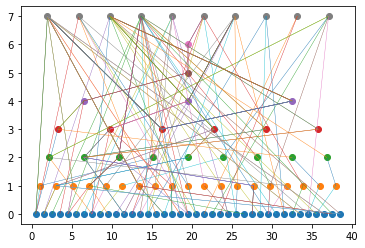

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 8, 8, 7, 8,
       6, 6, 6, 8, 8, 6, 7, 6, 3, 8, 8, 6, 8, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 6, 3,
       3, 8, 3, 3, 7, 6, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4,
       4, 4, 8, 7, 7, 7, 6, 4, 6, 4, 4, 8, 3, 6, 4, 4, 3, 3, 8, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 4, 7, 7, 7, 4, 7, 4, 4, 7, 7, 7, 7, 8, 6, 7, 7, 3, 6, 3, 6, 3,
       3, 6, 3, 3, 6, 3, 8, 3, 7, 0, 3, 7, 7, 3, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 6], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4444444444444444

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  1  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1 16 13  0  4  0  0  8 10]
 [ 0  0  0  0 16  5  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  1  2  3 18  0  5  1]
 [ 0  4  0  0  2  3  0 15  2  3]
 [ 0  8  0  4  0  3  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


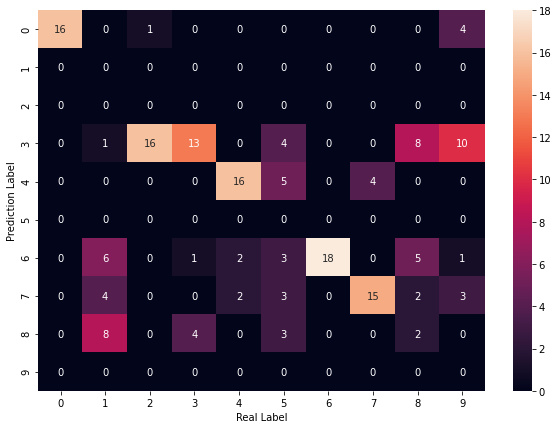

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [39, 19, 9, 6, 3, 1, 1, 10]


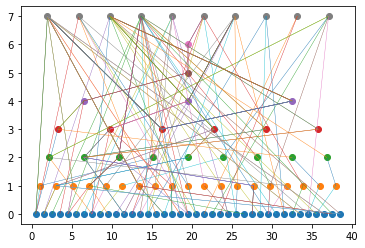

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

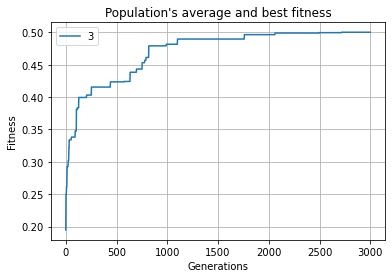

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [39, 19, 9, 6, 3, 1, 1, 10]
Total nodes:88 Total connections::193
